<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek34.do.txt  -->
<!-- dom:TITLE: Exercises week 34 -->

# Exercises week 34
**FYS-STK3155/4155**

Date: **August 21-25, 2023**

## Exercises

Here are three possible exercises for week 34

## Exercise 1: Setting up various Python environments

The first exercise here is of a mere technical art. We want you to have 
* git as a version control software and to establish a user account on a provider like GitHub. Other providers like GitLab etc are equally fine. You can also use the University of Oslo [GitHub facilities](https://www.uio.no/tjenester/it/maskin/filer/versjonskontroll/github.html). 

* Install various Python packages

We will make extensive use of Python as programming language and its
myriad of available libraries.  You will find
IPython/Jupyter notebooks invaluable in your work.  You can run **R**
codes in the Jupyter/IPython notebooks, with the immediate benefit of
visualizing your data. You can also use compiled languages like C++,
Rust, Fortran etc if you prefer. The focus in these lectures will be
on Python.

If you have Python installed (we recommend Python3) and you feel
pretty familiar with installing different packages, we recommend that
you install the following Python packages via **pip** as 

1. pip install numpy scipy matplotlib ipython scikit-learn sympy pandas pillow 

For **Tensorflow**, we recommend following the instructions in the text of 
[Aurelien Geron, Hands‑On Machine Learning with Scikit‑Learn and TensorFlow, O'Reilly](http://shop.oreilly.com/product/0636920052289.do)

We will come back to **tensorflow** later. 

For Python3, replace **pip** with **pip3**.

For OSX users we recommend, after having installed Xcode, to
install **brew**. Brew allows for a seamless installation of additional
software via for example 

1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution,
you can use **pip** as well and simply install Python as 

1. sudo apt-get install python3  (or python for Python2.7)

If you don't want to perform these operations separately and venture
into the hassle of exploring how to set up dependencies and paths, we
recommend two widely used distrubutions which set up all relevant
dependencies for Python, namely 

* [Anaconda](https://docs.anaconda.com/), 

which is an open source
distribution of the Python and R programming languages for large-scale
data processing, predictive analytics, and scientific computing, that
aims to simplify package management and deployment. Package versions
are managed by the package management system **conda**. 

* [Enthought canopy](https://www.enthought.com/product/canopy/) 

is a Python
distribution for scientific and analytic computing distribution and
analysis environment, available for free and under a commercial
license.

We recommend using **Anaconda** if you are not too familiar with setting paths in a terminal environment.

## Exercise 2: making your own data and exploring scikit-learn

We will generate our own dataset for a function $y(x)$ where $x \in [0,1]$ and defined by random numbers computed with the uniform distribution. The function $y$ is a quadratic polynomial in $x$ with added stochastic noise according to the normal distribution $\cal {N}(0,1)$.
The following simple Python instructions define our $x$ and $y$ values (with 100 data points).

In [86]:
import pandas as pd

x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

1. Write your own code (following the examples under the [regression notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html)) for computing the parametrization of the data set fitting a second-order polynomial. 

2. Use thereafter **scikit-learn** (see again the examples in the regression slides) and compare with your own code.   

3. Using scikit-learn, compute also the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.
If $\tilde{\boldsymbol{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. 
Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

## Solution Exercise 2

Start by importing packages and generating a results save folder

In [2]:
import os 

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

Define $x$ and $y$ as in the exercise text: 

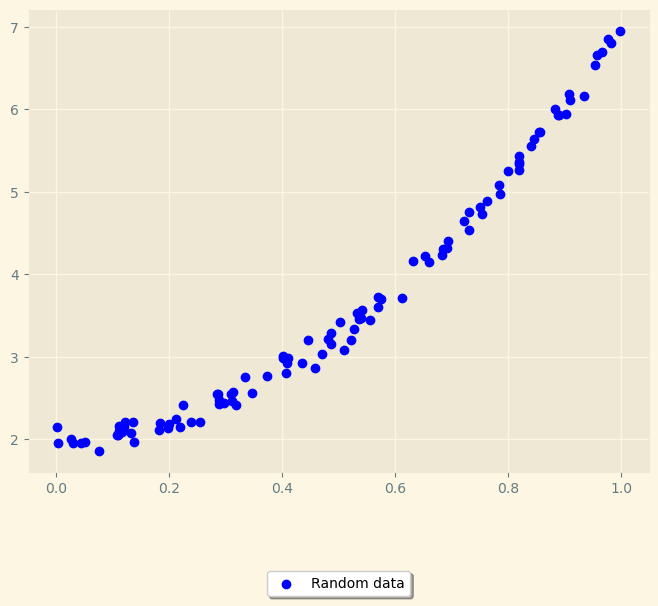

In [4]:
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

# Plotting to get an idea of what we are dealing with. 
fig, ax = plt.subplots(figsize=[8,6])

ax.scatter(x, y, 
            color='blue',
            label='Random data')

# Legg til en legend nederst sentrert i en separat boks
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), #lokasjon
                   fancybox=True, shadow=True) # utseende for boksen
legend.get_frame().set_facecolor('white') #uteseende for boksenplt.show()

plt.show()

In order to fit the parametrization of a second order polynomial we have to:
- Define the design matrix $X\in \mathbb{R}^{100\times 3}$
- Split the design matrix and solution vector into: train and test data
- In order to solve the least-square problem of the line fitting we estimate the parametres $\mathbf{\beta} \in \mathbb{R}^3$. This is done by solving the normal equation $\hat{\beta} = (X^TX)^{-1}X^T\mathbf{y}$. 

Then we repeat the learning using scikit-learn in order to compare with the methode of solving the normal equation. 

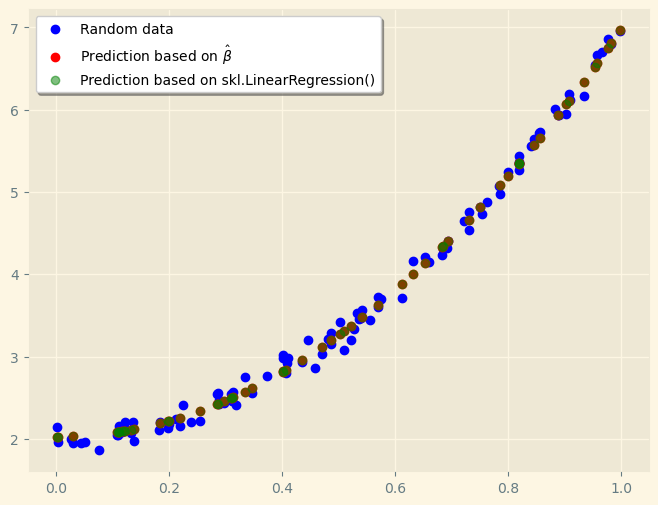

In [5]:
X = np.hstack((np.ones_like(x), x, x**2)) # Designmatrisen med 1 ere, x og kvadrert x i siste kolonne

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # Deler opp modeldataen i trenings og test-data

def normal_equation(X, y):
    X_t = np.transpose(X)
    return np.linalg.inv(X_t @ X) @ (X_t @ y)

beta = normal_equation(X_train, y_train)

y_tilde = X_train @ beta

linreg = skl.LinearRegression()
linreg.fit(X_train, y_train)
ypredict = linreg.predict(X_train)

# Plotting for å se hvordan prediksjonen passer til linjen  
fig, ax = plt.subplots(figsize=[8,6])


ax.scatter(x, y, 
            color='blue',
            label='Random data')

ax.scatter(X_train[:,1], y_tilde,
           color='red',
           label=r'Prediction based on $\hat{\beta}$')

ax.scatter(X_train[:,1], ypredict,
           color='green',
           alpha=0.5,
           label=r'Prediction based on skl.LinearRegression()')

# Legg til en legend nederst sentrert i en separat boks
legend = ax.legend(loc='upper left', #lokasjon
                   fancybox=True, shadow=True) # utseende for boksen
legend.get_frame().set_facecolor('white') #uteseende for boksenplt.show()

save_fig('Regression over random data')
plt.show()

In [6]:
# The mean squared error                               
print(f'Mean squared error: {mean_squared_error(y_train, y_tilde):.2f}')

# Explained variance score: 1 is perfect prediction                                 
print(f'Variance score: {r2_score(y_train, y_tilde):.2f}')

Mean squared error: 0.01
Variance score: 1.00


## Exercise 3: Split data in test and training data

In this exercise we want you to compute the MSE for the training
data and the test data as function of the complexity of a polynomial,
that is the degree of a given polynomial.

The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).

Our data is defined by $x\in [-3,3]$ with a total of for example $n=100$ data points. You should try to vary the number of data points $n$ in your analysis.

In [3]:
np.random.seed(200)
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

where $y$ is the function we want to fit with a given polynomial.

**a)**
Write a first code which sets up a design matrix $X$ defined by a fifth-order polynomial and split your data set in training and test data.

In [4]:
# Setter opp designmatrisen for polynomet [1, x, x^2, x^3, x^4, x^5]
X = np.hstack((np.ones_like(x), x, x**2, x**3, x**4, x**5))

# Splitter opp dataen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # Deler opp modeldataen i trenings og test-data

**b)**
Write thereafter (using either **scikit-learn** or your matrix inversion code using for example **numpy**) and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.

In [5]:
beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

print(f'The parameteres are defined for a polynomial of {len(beta)-1}th order')

y_tilde = X_train @ beta
y_predicted = X_test @ beta

# The mean squared error                               
print(f'Mean squared error training: {mean_squared_error(y_train, y_tilde):.4f}')
print(f'Mean squared error testing: {mean_squared_error(y_test, y_predicted):.4f}')

The parameteres are defined for a polynomial of 5th order
Mean squared error training: 0.0233
Mean squared error testing: 0.0265


**c)**
Add now a model which allows you to make polynomials up to degree $15$.  Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

In [10]:
# OLS 
def OLS_and_cost_calc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # Deler opp modeldataen i trenings og test-data
    
    beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
    
    y_tilde = X_train @ beta
    y_predicted = X_test @ beta
    
    MSE_train = mean_squared_error(y_train, y_tilde)
    MSE_test = mean_squared_error(y_test, y_predicted)
    
    return MSE_train, MSE_test

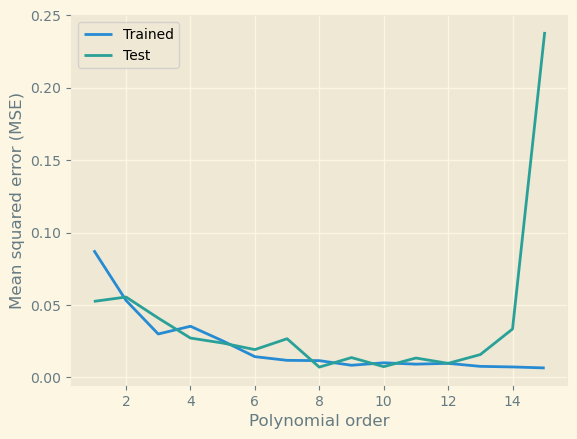

In [13]:
# The design matrix
X = np.hstack((np.ones_like(x)))

MSE = {'Trained': [],
       'Test': []}
orders = np.arange(1, 16)
for order in orders:
    X = np.column_stack((X, x**order))

    MSE_trained, MSE_test = OLS_and_cost_calc(X, y)    
    
    MSE['Trained'].append(MSE_trained)
    MSE['Test'].append(MSE_test)

plt.plot(orders, MSE['Trained'], label='Trained')
plt.plot(orders, MSE['Test'], label='Test')

plt.xlabel('Polynomial order')
plt.ylabel('Mean squared error (MSE)')
plt.legend()

save_fig('Overfitted data')
plt.show()

In [25]:
position_optimal_degree = np.argmin(MSE['Test']) 
print(f'The optimal degree for the polynomial is: {position_optimal_degree +1}')

The optimal degree for the polynomial is: 8


The results show an overfitting has occured. This can be identified by the fact the MSE for the training data converges towards lower values, while MSE for the test starts to increas again as the degree is upped. The optimal degree for this random data and this polynomial is a polynomial of degree 8.